In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

electricity_data = pd.read_csv("../../../Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/meters/raw/electricity.csv", index_col='timestamp', parse_dates=True)
weather_data = pd.read_csv("../../../Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/weather/weather.csv", index_col='timestamp', parse_dates=True)

In [47]:
electricity_data.head()

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [48]:
weather_data.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


# Trabalhando com os dados elétricos

Começo trabalhando com um edifício específico como exemplo, para compreender como posso fazer o tratamentos dos dados. Por serem dados de medição temporal em horas, devo limpar os dados e reajustá-los para outra escala, em dias ou em meses.

In [49]:
edificio_01 = electricity_data.iloc[:,[0]]
edificio_01

,Panther_parking_Lorriane
timestamp,
2016-01-01 00:00:00,0.0000
2016-01-01 01:00:00,0.0000
2016-01-01 02:00:00,0.0000
2016-01-01 03:00:00,0.0000
2016-01-01 04:00:00,0.0000
...,...
2017-12-31 19:00:00,15.4830
2017-12-31 20:00:00,12.7224
2017-12-31 21:00:00,11.2822


In [50]:
edificio_01.index[5].month

1

In [51]:
edificio_01.index[5].hour

5

In [52]:
edificio_01.index[5].year

2016

<AxesSubplot:xlabel='timestamp'>

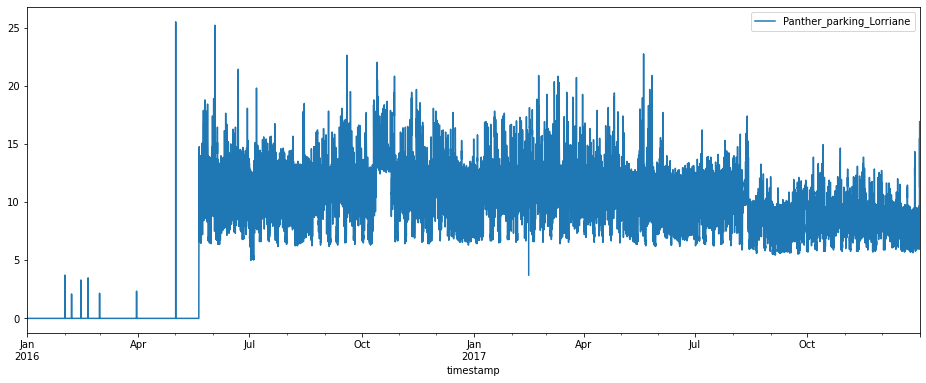

In [53]:
edificio_01.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

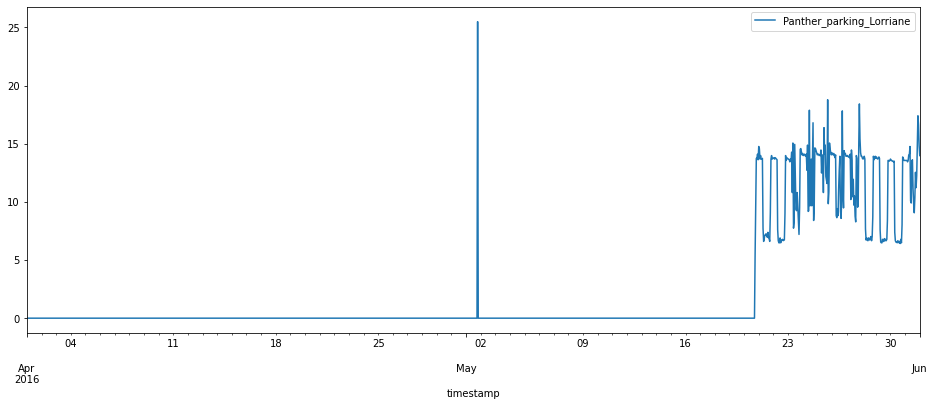

In [54]:
edificio_01_inicio = edificio_01.truncate(before = "2016-04-01", after="2016-06-01")
edificio_01_inicio.plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

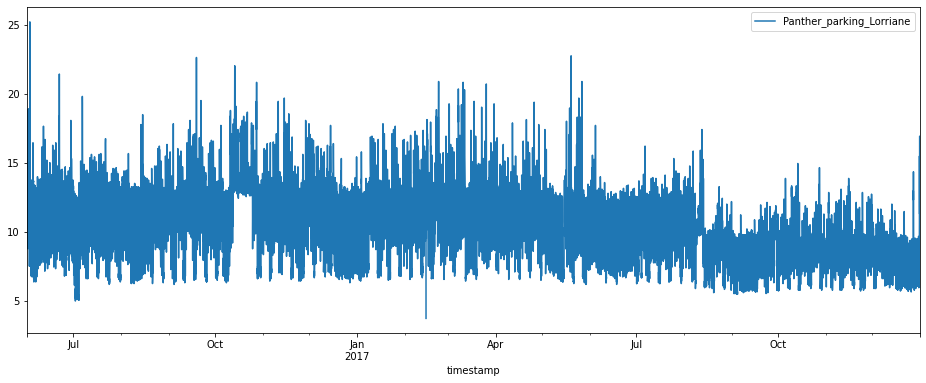

In [55]:
edificio_01= edificio_01.truncate(before="2016-06-01")
edificio_01.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

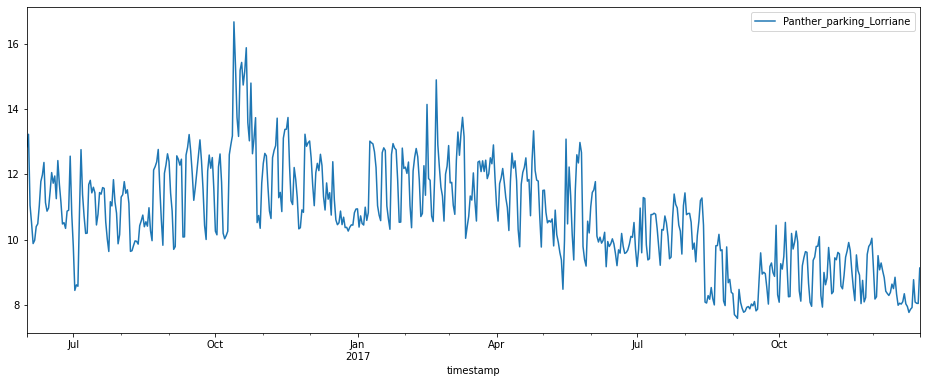

In [56]:
edificio_01_diario = edificio_01.resample("D").mean()
edificio_01_diario.plot(figsize=(16,6))

<AxesSubplot:xlabel='timestamp'>

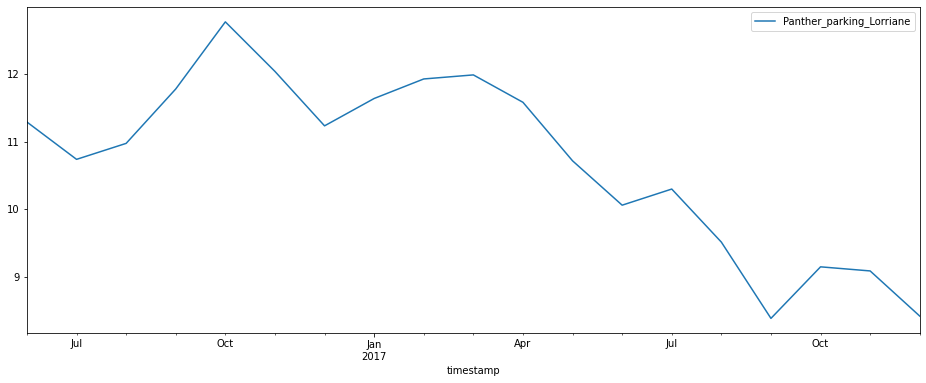

In [57]:
edificio_01_mensal = edificio_01.resample("M").mean()
edificio_01_mensal.plot(figsize=(16,6))

In [58]:
edificio_01_media_movel = edificio_01_diario.rolling(7, center=True).mean()
edificio_01_media_movel.head(15)

,Panther_parking_Lorriane
timestamp,
2016-06-01,NaN
2016-06-02,NaN
2016-06-03,NaN
2016-06-04,11.124285
2016-06-05,10.787078
2016-06-06,10.474875
2016-06-07,10.578824
2016-06-08,10.790295
2016-06-09,11.145364


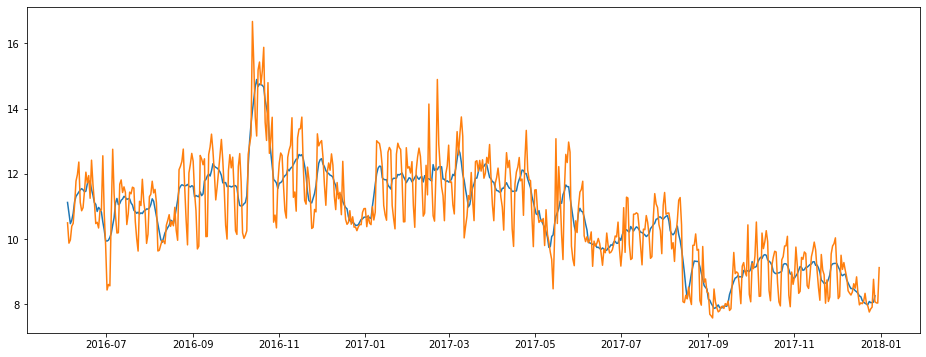

In [59]:
start, end = '2016-06-04', '2017-12-31'
fig, ax = plt.subplots(figsize=(16, 6))
#edificio_01_media_movel[start]
ax.plot(edificio_01_media_movel.loc[start:end, "Panther_parking_Lorriane"])
ax.plot(edificio_01_diario.loc[start:end, "Panther_parking_Lorriane"])

Agora vou repetir esse processo mas trabalhando com um grande número de edifícios. Inicialmente trabalharei com 20, para depois testar se posso fazer mais.
Para efeito de comparação, vou selecionar edifícios de um mesmo grupo de uso. De acordo com a análise dos metadados, o grupo educacional é o que tem uma maior quantidade de edifícios. Posso selecionar esse grupo pelo nome nos dados elétricos.

In [60]:
electricity_data.iloc[:,1].name
edu_buildings = [column for column in electricity_data.columns if 'office' in electricity_data[column].name]
edu_elec_data = electricity_data.loc[:,edu_buildings]
edu_elec_data

,Panther_office_Hannah,Panther_office_Catherine,Panther_office_Patti,Panther_office_Lauretta,Panther_office_Valarie,Panther_office_Karla,Panther_office_Graham,Panther_office_Larry,Panther_office_Ruthie,Panther_office_Garth,...,Cockatoo_office_Lorraine,Cockatoo_office_Margaret,Cockatoo_office_Alton,Cockatoo_office_Laila,Cockatoo_office_Gail,Cockatoo_office_Jodie,Cockatoo_office_Giovanni,Cockatoo_office_Roxanna,Cockatoo_office_Christy,Cockatoo_office_Ada
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.850,2.325,76.650,195.775,13.475,32.200,99.350,6.625,150.075,374.200
2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.925,2.225,83.275,193.775,14.475,33.725,98.375,6.750,145.175,375.450
2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,8.125,2.275,80.325,194.850,13.625,32.725,106.850,7.150,146.325,390.425
2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.925,2.575,81.700,199.750,12.650,34.100,98.050,6.800,148.900,380.950
2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,7.900,3.075,84.250,196.625,13.850,34.525,105.875,5.825,150.600,377.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,3.4357,71.0937,404.0780,154.3498,57.0510,16.0831,47.7092,24.8048,132.8256,30.7259,...,5.525,3.350,85.000,215.275,22.000,77.750,94.375,8.125,174.600,333.600
2017-12-31 20:00:00,3.4087,74.0543,410.4792,151.7093,56.5309,15.9631,48.1093,24.8048,138.0266,30.8860,...,5.575,3.100,75.275,208.475,20.575,78.475,94.850,8.500,175.450,328.675
2017-12-31 21:00:00,3.3546,64.2524,418.4808,152.1894,53.6904,15.9631,48.8094,24.3247,137.1265,30.9660,...,6.125,3.725,82.475,203.450,20.150,77.750,92.775,8.450,172.900,302.925


Agora vou selecionar apenas os 20 primeiros

In [61]:
edu_small_group = edu_elec_data.iloc[:,:20]
edu_small_group

,Panther_office_Hannah,Panther_office_Catherine,Panther_office_Patti,Panther_office_Lauretta,Panther_office_Valarie,Panther_office_Karla,Panther_office_Graham,Panther_office_Larry,Panther_office_Ruthie,Panther_office_Garth,Panther_office_Shauna,Panther_office_Jesus,Panther_office_Taryn,Panther_office_Otto,Panther_office_Christian,Panther_office_Clementine,Panther_office_Danica,Panther_office_Christin,Panther_office_Antonette,Panther_office_Kristen
timestamp,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.3630,0.0000,0.0000,0.0000,0.0000
2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,3.4357,71.0937,404.0780,154.3498,57.0510,16.0831,47.7092,24.8048,132.8256,30.7259,149.0288,61.1118,65.6126,269.6520,58.7113,52.4441,2.6085,0.5001,51.6099,80.9906
2017-12-31 20:00:00,3.4087,74.0543,410.4792,151.7093,56.5309,15.9631,48.1093,24.8048,138.0266,30.8860,119.4230,60.2116,63.3122,262.0506,59.0114,55.8258,2.5695,0.4001,51.2899,81.7148
2017-12-31 21:00:00,3.3546,64.2524,418.4808,152.1894,53.6904,15.9631,48.8094,24.3247,137.1265,30.9660,138.0266,59.3114,63.2122,264.0510,58.7113,55.3187,2.5485,0.5001,51.4499,81.8918


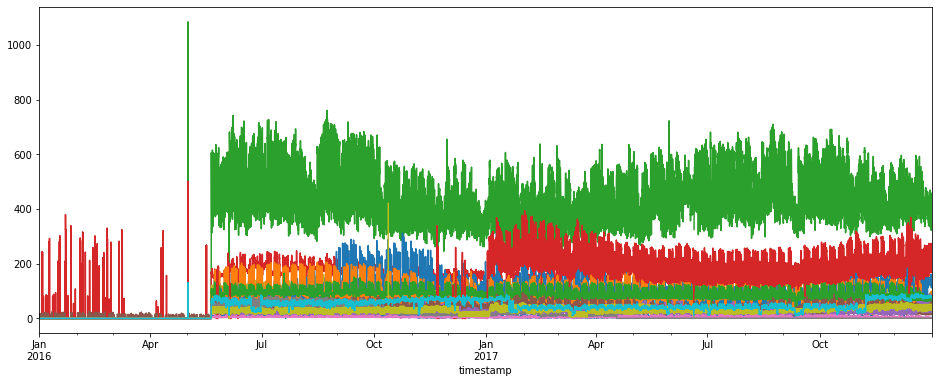

In [62]:
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

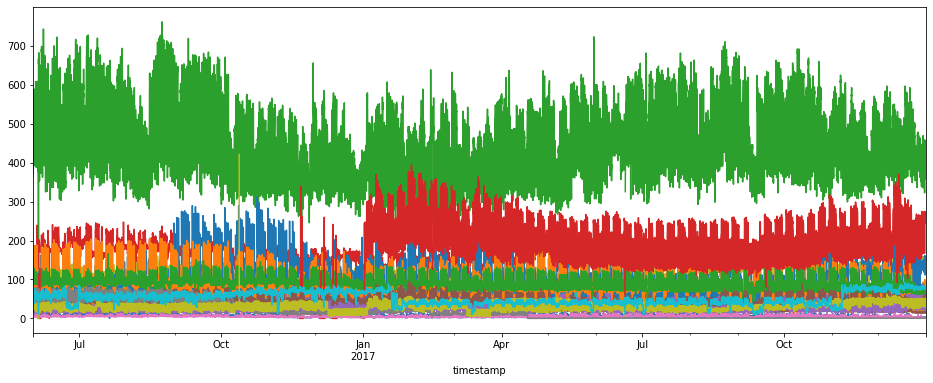

In [63]:
edu_small_group= edu_small_group.truncate(before="2016-06-01")
for col in edu_small_group.columns:
    edu_small_group[col].plot(figsize=(16,6))

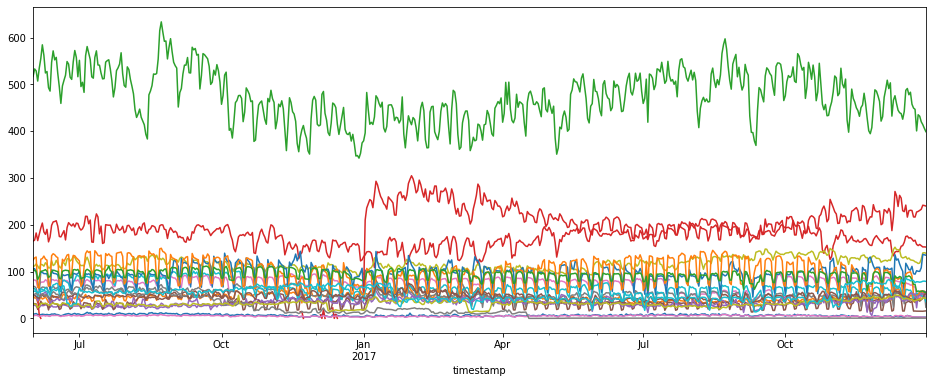

In [64]:
edu_small_group_diario = edu_small_group.resample("D").mean()
for col in edu_small_group_diario.columns:
    edu_small_group_diario[col].plot(figsize=(16,6))

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

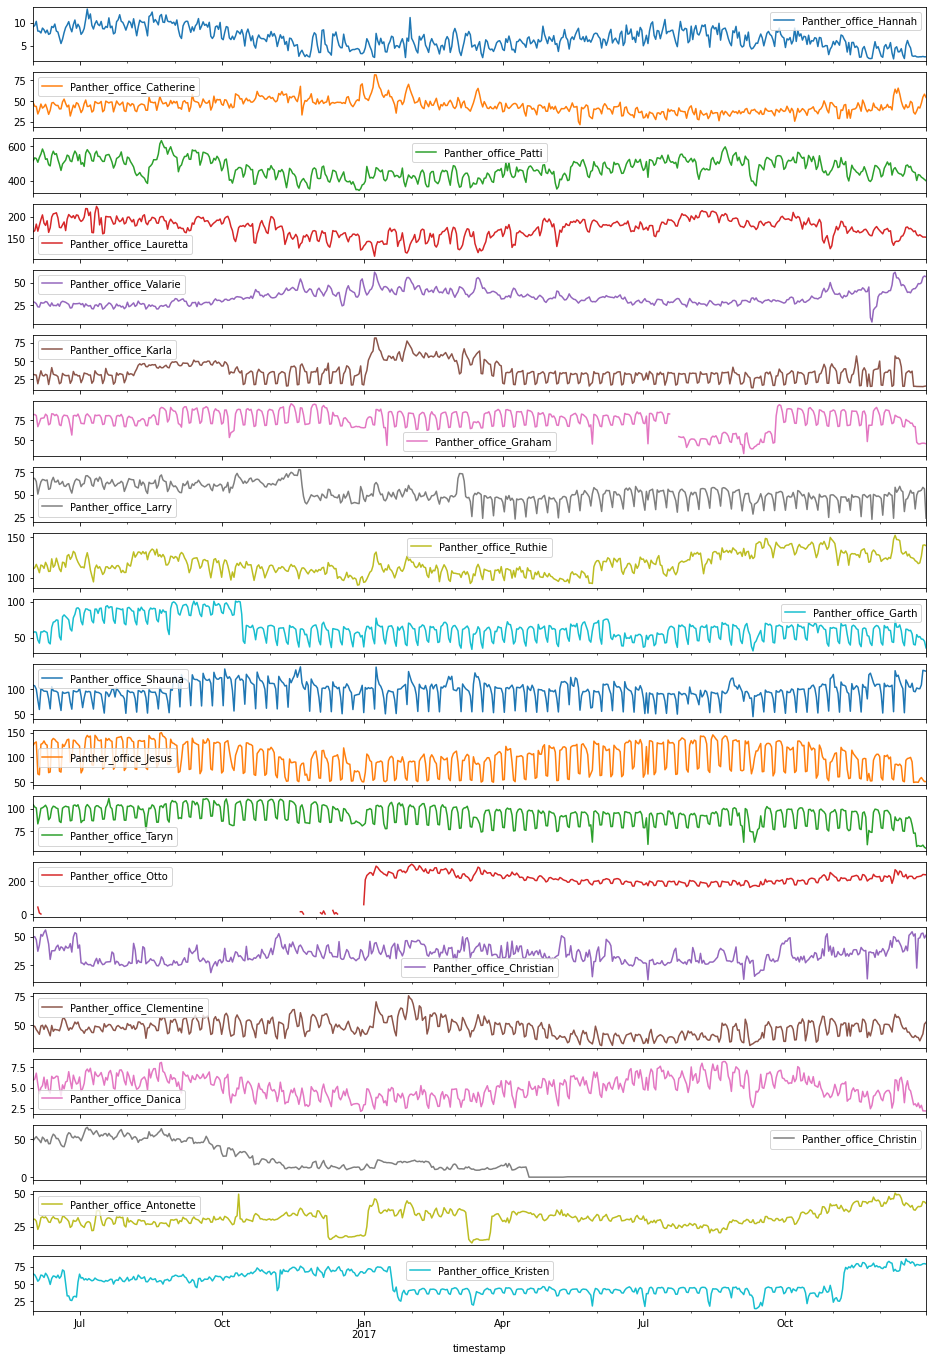

In [65]:
edu_small_group_diario.plot(figsize=(16,24), subplots=True)

Agora posso fazer esse processo com todos os dados. Para testar eu crio gráficos dos 20 primeiros edifícios usando a função iloc[:,:20]. Esses gráficos devem ser iguais aos que criei anteriormente.


In [78]:
edu_elec_data = edu_elec_data.truncate(before='2016-06-01')
edu_elec_data_diario = edu_elec_data.resample("D").mean()


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

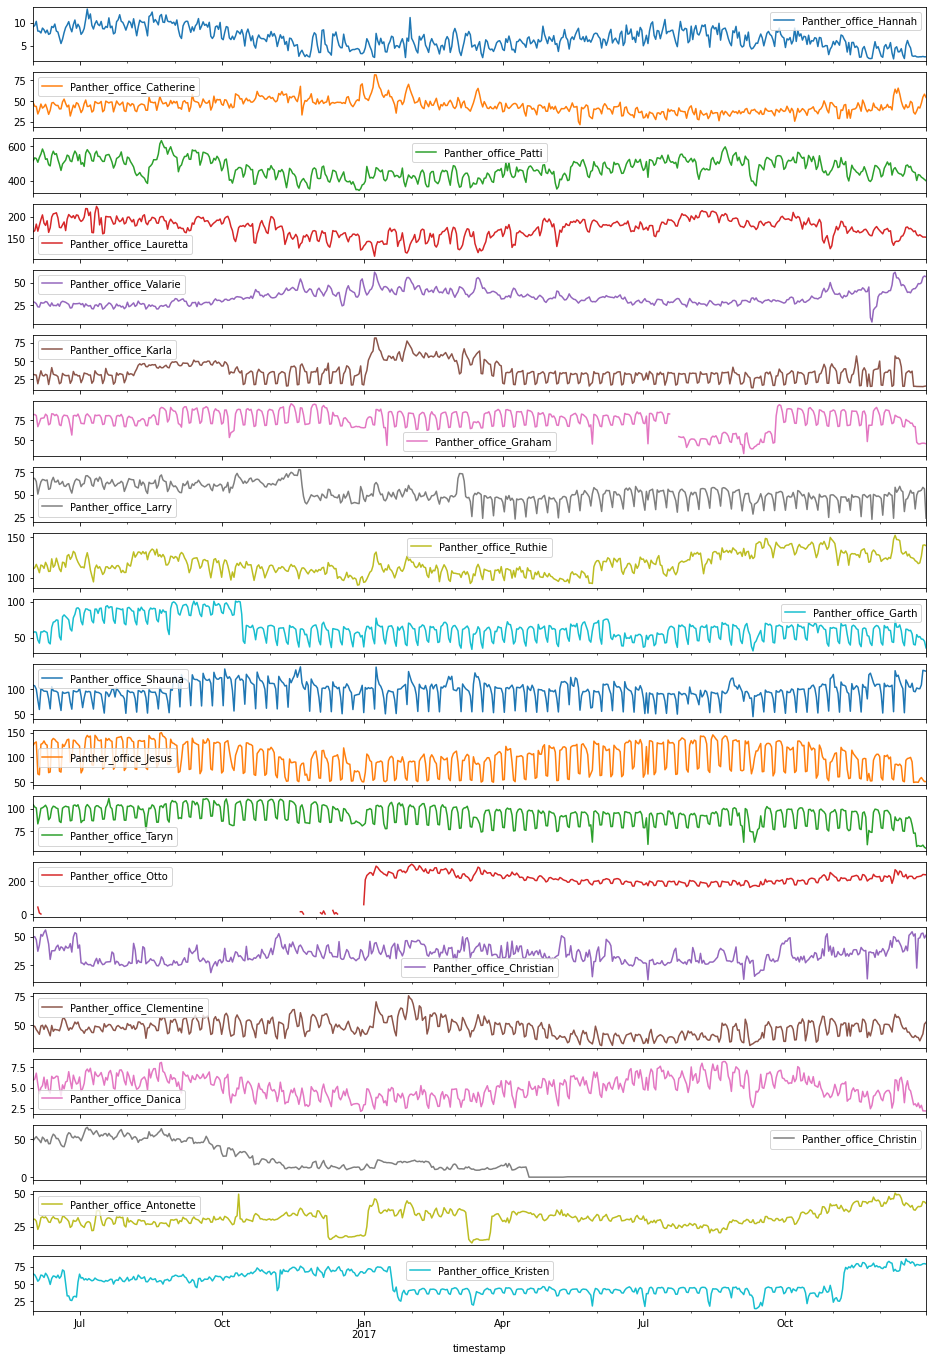

In [67]:
edu_elec_data_diario.iloc[:,:20].plot(figsize=(16, 24), subplots=True)

# Trabalhando com os dados climáticos

Aqui faço o processo básico de preencher os dados vazios. Esses dados foram analisados em outro notebook e foi possível ver que não habia valores discrepantes.

In [98]:
weather_data_nogaps = weather_data.fillna(method='ffill')
weather_data_nogaps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331166 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   site_id         331166 non-null  object 
 1   airTemperature  331166 non-null  float64
 2   cloudCoverage   331165 non-null  float64
 3   dewTemperature  331166 non-null  float64
 4   precipDepth1HR  331166 non-null  float64
 5   precipDepth6HR  331159 non-null  float64
 6   seaLvlPressure  331165 non-null  float64
 7   windDirection   331166 non-null  float64
 8   windSpeed       331166 non-null  float64
dtypes: float64(8), object(1)
memory usage: 25.3+ MB


<AxesSubplot:xlabel='timestamp'>

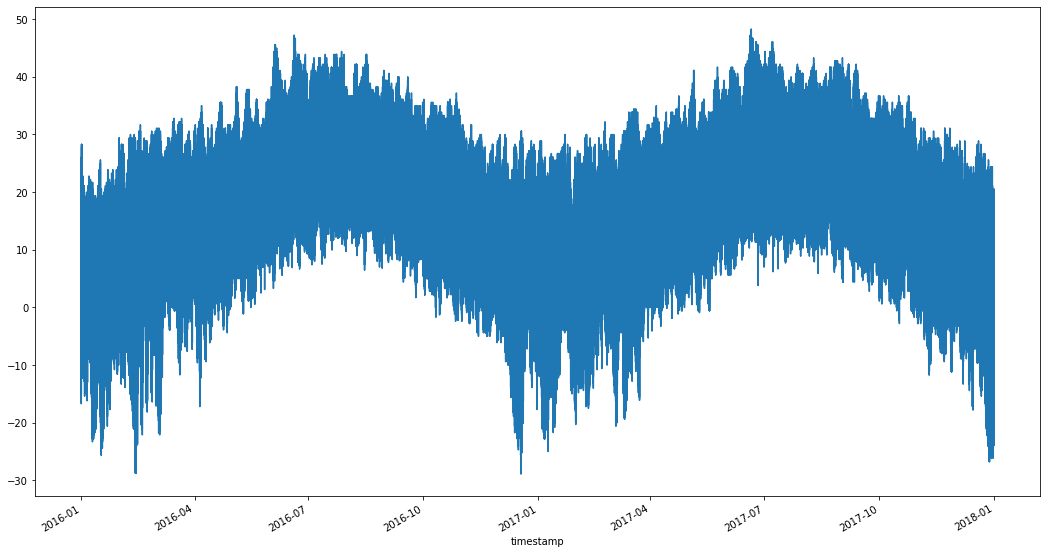

In [99]:
weather_data_nogaps['airTemperature'].plot(figsize=(18,10))

Os dados climáticos devem ter o mesmo padrão dos dados de eletricidade para que possam ser combinados depois.
Portanto, faço a transformação para média diária.
Devo igualar também o período dos dados. Os dados elétricos estão de Junho de 2016 até o fim de 2017. Deve fazer o mesmo com os dados climáticos

<AxesSubplot:xlabel='timestamp'>

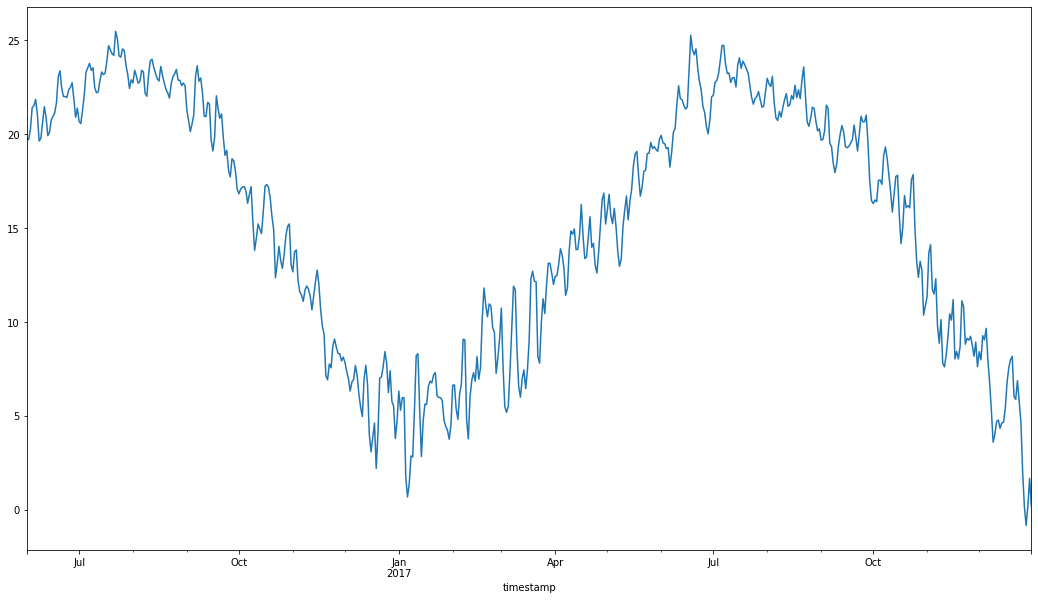

In [102]:
temperature_data = weather_data_nogaps.loc[:, 'airTemperature']
temperature_data.sort_index(inplace=True) # This ensures that the index is sorted so the truncate function can be used
temperature_data = temperature_data.truncate(before='2016-06-01')
temperatura_data_diario = temperature_data.resample("D").mean()
temperatura_data_diario.plot(figsize=(18, 10))

# Juntando os dados

In [106]:
all_data = pd.concat([edu_elec_data_diario, temperatura_data_diario], axis=1)
all_data.head()

,Panther_office_Hannah,Panther_office_Catherine,Panther_office_Patti,Panther_office_Lauretta,Panther_office_Valarie,Panther_office_Karla,Panther_office_Graham,Panther_office_Larry,Panther_office_Ruthie,Panther_office_Garth,...,Cockatoo_office_Margaret,Cockatoo_office_Alton,Cockatoo_office_Laila,Cockatoo_office_Gail,Cockatoo_office_Jodie,Cockatoo_office_Giovanni,Cockatoo_office_Roxanna,Cockatoo_office_Christy,Cockatoo_office_Ada,airTemperature
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-01,9.161767,47.769221,517.099796,165.311913,28.477154,31.846150,81.853288,68.306504,110.833879,57.169367,...,3.117012,93.181250,222.593404,22.509721,48.825696,142.291667,8.143750,218.821875,473.837846,19.761233
2016-06-02,9.414929,43.650096,533.136217,167.232263,27.978729,31.396058,82.061675,68.086467,112.309175,58.269583,...,3.174304,96.546875,227.293750,22.882292,50.425000,148.589583,7.936458,217.678125,483.902083,19.716703
2016-06-03,10.330779,43.366704,528.935408,182.585233,26.456779,30.915963,80.686404,64.679146,116.397458,57.519438,...,2.993750,88.512500,229.923958,21.069792,46.818750,147.136458,7.520833,188.134375,458.813542,20.280220
2016-06-04,8.199458,34.194933,507.231213,166.192067,22.897746,19.153704,66.983762,50.616437,111.917433,46.845704,...,2.376042,74.589583,221.417708,14.815625,38.279167,125.622917,5.995833,146.257292,431.755208,21.414035
2016-06-05,8.174238,38.812483,534.903225,179.264592,22.727721,27.945408,71.805529,57.897838,106.191317,42.443196,...,2.503125,72.597917,219.669792,14.733333,40.012500,119.959375,5.888542,146.216667,440.083333,21.519737


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

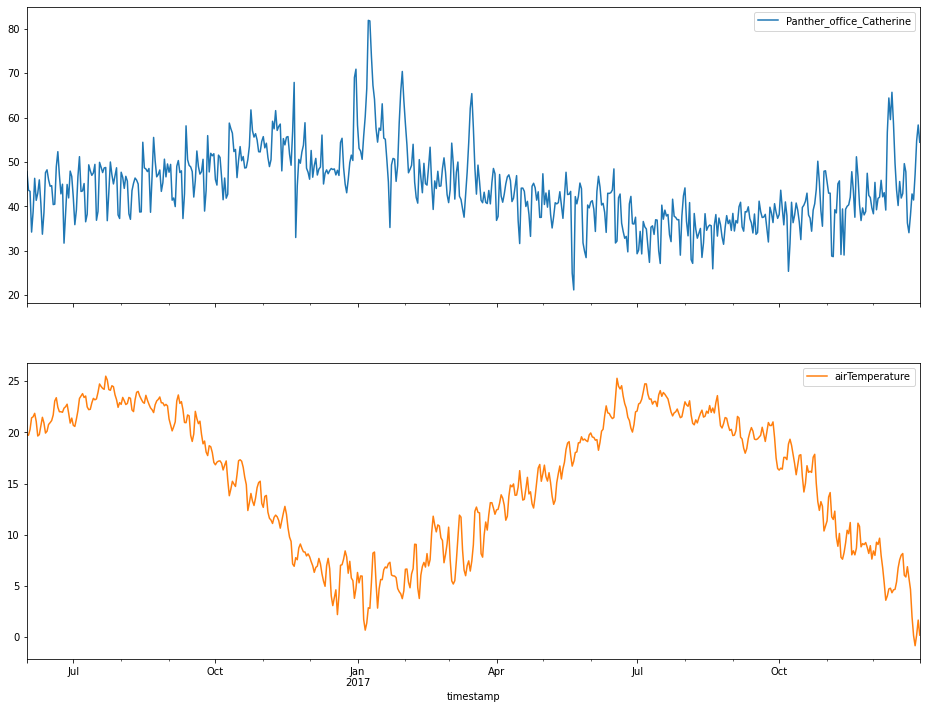

In [114]:
comparison = all_data.iloc[:, [1,-1]]
comparison.plot(figsize=(16, 12), subplots=True)